<hr>
<h4>📦 Importing Libraries</h4>
<p>We start by importing the necessary Python libraries:</p>
<ul>
  <li><code>time</code> – to measure execution time (e.g., training duration).</li>
  <li><code>pandas</code> – for data handling and manipulation using dataframes.</li>
  <li><code>matplotlib.pyplot</code> – for plotting graphs such as the loss curve or regression line.</li>
</ul>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
import pandas as pd
df = pd.DataFrame({'x': [1, 2, 3], 'y': [2, 4, 6]})
print(df)
</pre>
<p>This creates a small dataset with two columns, which can be used in regression tasks.</p>

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

<hr>
<h4>📄 Loading the Dataset</h4>
<p>We load the dataset from a CSV file named <code>price-prediction.csv</code> using <code>pandas.read_csv()</code>. The resulting data is stored in a DataFrame called <code>data</code>.</p>
<p>Displaying <code>data</code> shows the first few rows of the dataset, helping us understand its structure.</p>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
df = pd.read_csv('example.csv')
df
</pre>
<p>This would show the contents of a file named <code>example.csv</code> if it exists in the working directory.</p>

In [2]:
# Read the dataset
data = pd.read_csv('price-prediction.csv')
data.head(5)

,PLOTS,PRICE
0,120,550000
1,145,645000
2,160,700000
3,110,475000
4,180,825000


<hr>
<h4>📊 Visualizing the Data</h4>
<p>We use a scatter plot to visualize the relationship between <code>PLOTS</code> (independent variable) and <code>PRICE</code> (dependent variable).</p>
<ul>
  <li><code>plt.scatter()</code> plots the data points.</li>
  <li><code>plt.xlabel()</code> and <code>plt.ylabel()</code> label the axes.</li>
  <li><code>plt.title()</code> adds a title to the chart.</li>
  <li><code>plt.show()</code> displays the plot.</li>
</ul>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
x = [1, 2, 3]
y = [2, 4, 6]
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Plot")
plt.show()
</pre>
<p>This would show a straight-line relationship between x and y.</p>

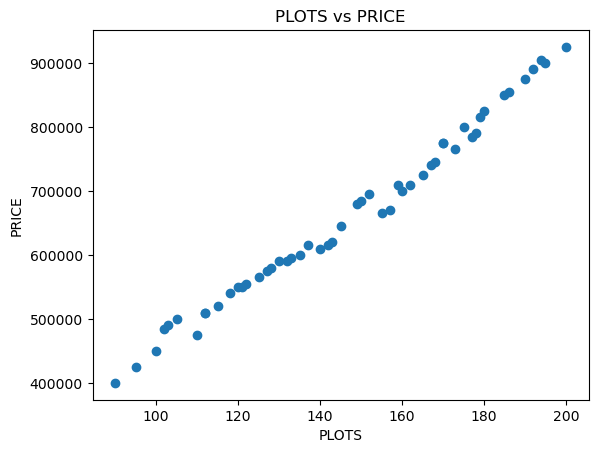

In [3]:
# Plot the original data
plt.scatter(data['PLOTS'], data['PRICE'])
plt.xlabel('PLOTS')
plt.ylabel('PRICE')
plt.title('PLOTS vs PRICE')
plt.show()

<hr>
<h4>📈 Defining a Function to Plot the Regression Line</h4>
<p>This function <code>plot_line(m, b, data)</code> plots both the actual data points and a predicted regression line based on the given slope <code>m</code> and intercept <code>b</code>.</p>

<ul>
  <li><b>Scatter plot:</b> Visualizes the actual data points using <code>plt.scatter()</code>.</li>
  <li><b>Range:</b> Determines the minimum and maximum plot sizes from the dataset.</li>
  <li><b>Prediction line:</b> Uses the equation <code>y = m * x + b</code> to generate predicted prices for each plot size.</li>
  <li><b>Line plot:</b> Plots the regression line in red to show the trend.</li>
</ul>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
# Sample data
m = 2
b = 1
x_vals = [0, 1, 2, 3]
y_vals = [m * x + b for x in x_vals]
plt.plot(x_vals, y_vals, color='red')
plt.title("Example Line: y = 2x + 1")
plt.show()
</pre>
<p>This would draw a straight line passing through (0,1), (1,3), (2,5), and (3,7).</p>

In [4]:
def plot_line(m, b, data):
    # Scatter plot of actual data
    plt.scatter(data['PLOTS'], data['PRICE'])

    # Get the smallest and largest plot sizes
    min_x = data['PLOTS'].min()
    max_x = data['PLOTS'].max()

    # Generate the predicted prices for the line
    x_vals = list(range(min_x, max_x + 1))
    y_vals = [m * x + b for x in x_vals]

    # Plot the regression line
    plt.plot(x_vals, y_vals, color='red')

    # Label axes and title
    plt.xlabel('PLOTS')
    plt.ylabel('PRICE')
    plt.title('Regression Line')
    plt.show()

<hr>
<h4>📉 Defining the Loss Function (Mean Squared Error)</h4>
<p>This function <code>compute_loss(m, b, data)</code> calculates the Mean Squared Error (MSE) between the actual prices and the predicted prices using the formula <code>y = mx + b</code>.</p>

<ul>
  <li><b>Prediction:</b> For each row, compute the predicted price.</li>
  <li><b>Error:</b> Calculate the difference between the actual price and the predicted price.</li>
  <li><b>Squared error:</b> Square the error to avoid negative values.</li>
  <li><b>Total error:</b> Sum all squared errors.</li>
  <li><b>Average:</b> Divide by the number of data points to get the mean.</li>
</ul>
<p>This loss value tells us how far off our predictions are — smaller is better.</p>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
# Suppose: m = 2, b = 1, data = [{x: 1, y: 3}, {x: 2, y: 5}]
Actual y: [3, 5]
Predicted y: [2*1+1=3, 2*2+1=5]
Error: [0, 0] → Squared: [0, 0] → MSE = 0
</pre>
<p>Perfect predictions result in a loss of 0.</p>

In [5]:
def compute_loss(m, b, data):

    total_error = 0
    
    for i in range(len(data)):
        x = data.iloc[i]['PLOTS']
        y = data.iloc[i]['PRICE']
        prediction = m * x + b
        error = y - prediction
        total_error += error ** 2

    return total_error / len(data)

<hr>
<h4>🔁 One Step of Gradient Descent</h4>
<p>The function <code>gradient_descent_step(m, b, data, lr)</code> performs a single update of the model parameters <code>m</code> (slope) and <code>b</code> (intercept) using gradient descent.</p>

<ul>
  <li><b>Error:</b> For each data point, calculate the prediction error.</li>
  <li><b>Gradients:</b> Compute partial derivatives of the loss with respect to <code>m</code> and <code>b</code>.</li>
  <li><b>Update:</b> Adjust <code>m</code> and <code>b</code> in the direction that reduces the error, scaled by the learning rate <code>lr</code>.</li>
</ul>

<p>This step helps the model learn better parameters gradually by minimizing the loss.</p>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
# Suppose initial m = 0, b = 0
# One data point: x = 2, y = 5
error = 5 - (0*2 + 0) = 5
m_grad = -2 * 2 * 5 = -20
b_grad = -2 * 5 = -10
# With lr = 0.01
new_m = 0 - 0.01 * (-20) = 0.2
new_b = 0 - 0.01 * (-10) = 0.1
</pre>
<p>This small step improves the prediction slightly.</p>

In [6]:
def gradient_descent_step(m, b, data, lr):
    m_grad = 0
    b_grad = 0
    N = len(data)

    for i in range(N):
        x = data.iloc[i]['PLOTS']
        y = data.iloc[i]['PRICE']
        error = y - (m * x + b)
        m_grad += -2 * x * error
        b_grad += -2 * error

    m = m - (lr * m_grad / N)
    b = b - (lr * b_grad / N)

    return m, b

<hr>
<h4>🏋️ Training the Linear Regression Model</h4>
<p>We initialize the model parameters and then train the model using gradient descent over several epochs.</p>

<ul>
  <li><b>Initial values:</b> Set <code>m = 0</code> and <code>b = 0</code>, with a small <code>learning_rate</code> and <code>epochs</code> (number of training cycles).</li>
  <li><b>Loop:</b> For each epoch:
    <ul>
      <li>Pause for 2 seconds (for easier visualization).</li>
      <li>Update <code>m</code> and <code>b</code> using <code>gradient_descent_step()</code>.</li>
      <li>Print the current epoch, updated parameters, and scaled-down loss (divided by 100,000 for readability).</li>
      <li>Plot the current regression line using <code>plot_line()</code>.</li>
    </ul>
  </li>
  <li><b>Final model:</b> Once training is done, the final values of <code>m</code> and <code>b</code> are printed.</li>
</ul>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
# With a few iterations, the model gradually fits the data
Epoch 1: m = 0.2, b = 0.1, loss = 120.5
Epoch 2: m = 0.35, b = 0.2, loss = 90.2
...
Final model: m = 1.12, b = 0.85
</pre>
<p>This means the best-fit line is approximately: <code>PRICE = 1.12 × PLOTS + 0.85</code>.</p>

Epoch 0: m = 0, b = 0, loss = 4568177.884615385


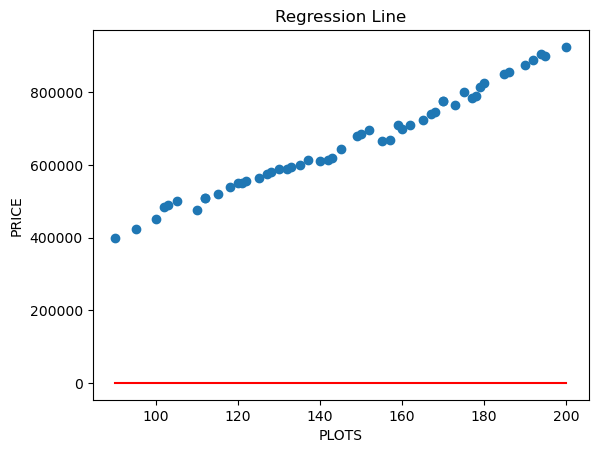

Epoch 1: m = 2023.6096153846156, b = 13.236538461538462, loss = 1391312.635486051


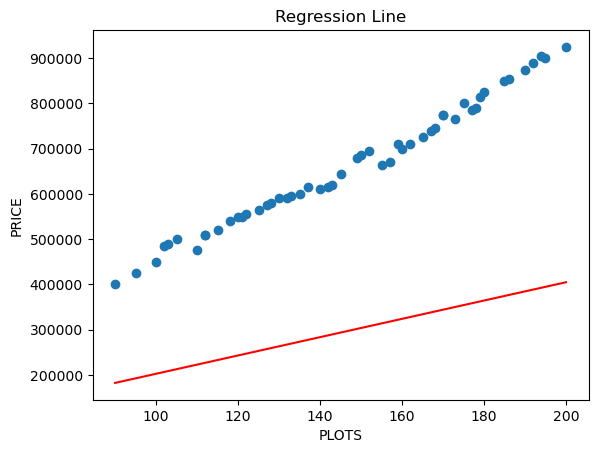

Epoch 3: m = 3755.1911861544954, b = 24.556711348518117, loss = 131074.72860146762


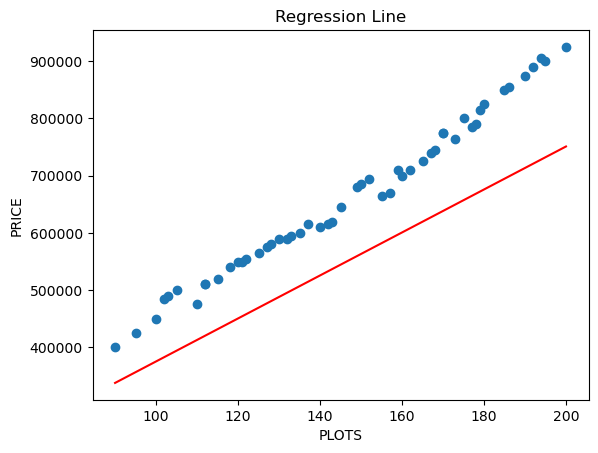

Epoch 5: m = 4281.889510364297, b = 27.992455466329393, loss = 14476.911235687137


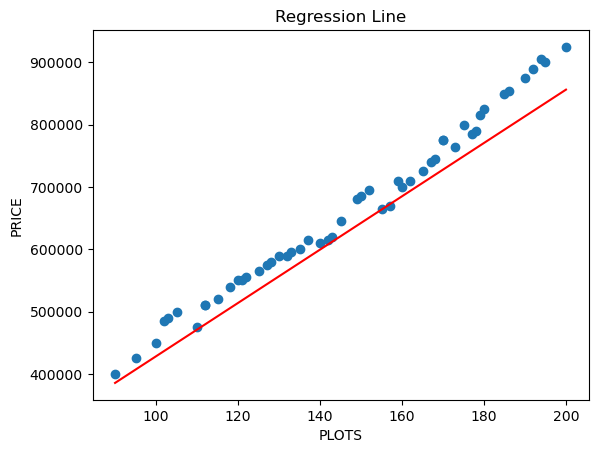

Epoch 7: m = 4442.096334462597, b = 29.02997874330677, loss = 3689.2250369002313


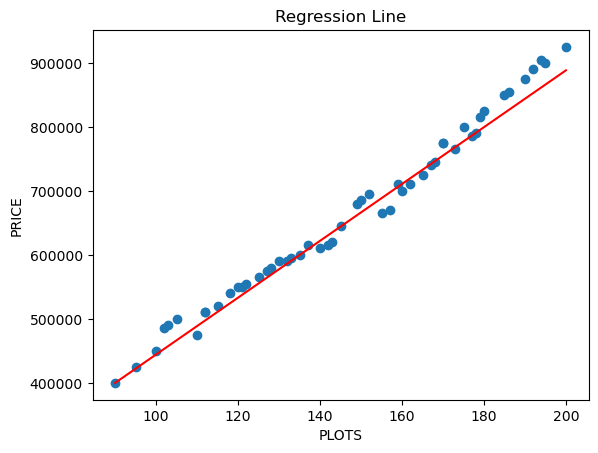


Final model:
m = 4473.504567883159
b = 29.230092362212822


In [7]:
# Initial values
m = 0
b = 0
learning_rate = 0.00001
epochs = 8

# Before training
print(f"Epoch 0: m = {m}, b = {b}, loss = {compute_loss(m, b, data)/100000}")
plot_line(m, b, data)

# Training loop
for i in range(epochs):
    # time.sleep(2)
    m, b = gradient_descent_step(m, b, data, learning_rate)
    if i % 2 == 0:
        print(f"Epoch {i+1}: m = {m}, b = {b}, loss = {compute_loss(m, b, data)/100000}")
        plot_line(m, b, data)

# Final model
print("\nFinal model:")
print(f"m = {m}")
print(f"b = {b}")

<hr>
<h4>🤖 Making a Prediction</h4>
<p>Now that our model is trained, we can use it to predict the price of land based on a user-provided plot size.</p>

<ul>
  <li><b>User input:</b> The user is prompted to enter the size of a plot (<code>x_input</code>).</li>
  <li><b>Prediction:</b> The model calculates the predicted price using the formula <code>PRICE = m * x + b</code>.</li>
  <li><b>Output:</b> The result is printed with two decimal places, prefixed with a dollar sign.</li>
</ul>

<!-- Optional Simple Example -->
<p><b>Example:</b></p>
<pre>
Enter the size of plot: 10
Predicted price for 10 size of plot: $112.85
</pre>
<p>This means the model estimates a plot of size 10 will cost around $112.85.</p>

In [8]:
# Predict price for a user-given plot size
x_input = int(input("\nEnter the size of plot: "))
predicted_price = m * x_input + b
print(f"Predicted price for {x_input} size of plot: RS.{predicted_price:.2f}")

Predicted price for 250 size of plot: RS.1118405.37


<hr>